 # Participation Distribution in Committee Selection

 ### Executive Summary

 In the following computer experiments, we aim to understand the
 distribution of selections in a committee when varying sizes of the
 participant pool of SPOs and the committee. We show that the
 "pigeonhole principle" helps us interpret the results and understand
 the finite distribution of the committee seats assigned to participants
 as a function of stake, group, and committee sizes.

 The experiment is designed to:
 - Sample without replacement a group of participants from the population
   and
 - Calculate the stake weight for each participant, which is the stake
   normalized over the group to sum to 1.
 - Assign a committee of the fixed group size based on the stake weight
   of each using random selection with replacement.
 - Analyze the relationship and distribution of committee selection with
   group size.

 We conducted the experiments with varying sizes (100, 200, ..., 500) of
 groups and committees. The results are visualized through plots of
 committee assignments where we vary the group size to see how the
 committee selection and seat count changes.

 The results show that some group members with smaller stake weights may
 not (ever?) get selected for committee seats. With repeated trials where
 a new committee is selected, called an *epoch*, and assuming nonzero
 stake weight, there is nonzero probability of selecting *any* participant
 in the long run. However, in the short term, there is a significant chance
 that some participants will not ever get selected, almost surely. This is
 a natural outcome of the selection process with a discrete and finite
 number of seats. This is a manifestation of this committee selection
 process as it currently stands.


In [ ]:
# %%

# Load the required libraries

from participation_lib import (
    np,
    pd,
    plt,
    sns,
    load_data,
    get_stake_distribution,
    assign_commitee_plus,
    simulate,
    std_error,
    plot_group_to_committee_index,
    plot_selection_count_vs_stake,
    plot_committee_selection_counts,
    plot_committee_selection_seat_cutoff,
)

In [ ]:
# %%

# Load the Data: The population of registered SPOs

population = load_data("../data/pooltool-cleaned.csv")

print(population.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3056 non-null   object 
 1   stake          3056 non-null   int64  
 2   stake_percent  3056 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 71.8+ KB
None


In [ ]:
# %%

population.describe()

,stake,stake_percent
count,3.056000e+03,3056.000000
mean,7.305314e+06,0.032723
std,1.648449e+07,0.073839
min,0.000000e+00,0.000000
25%,5.265000e+02,0.000002
50%,5.692500e+04,0.000255
75%,3.282500e+06,0.014703
max,1.054300e+08,0.472250


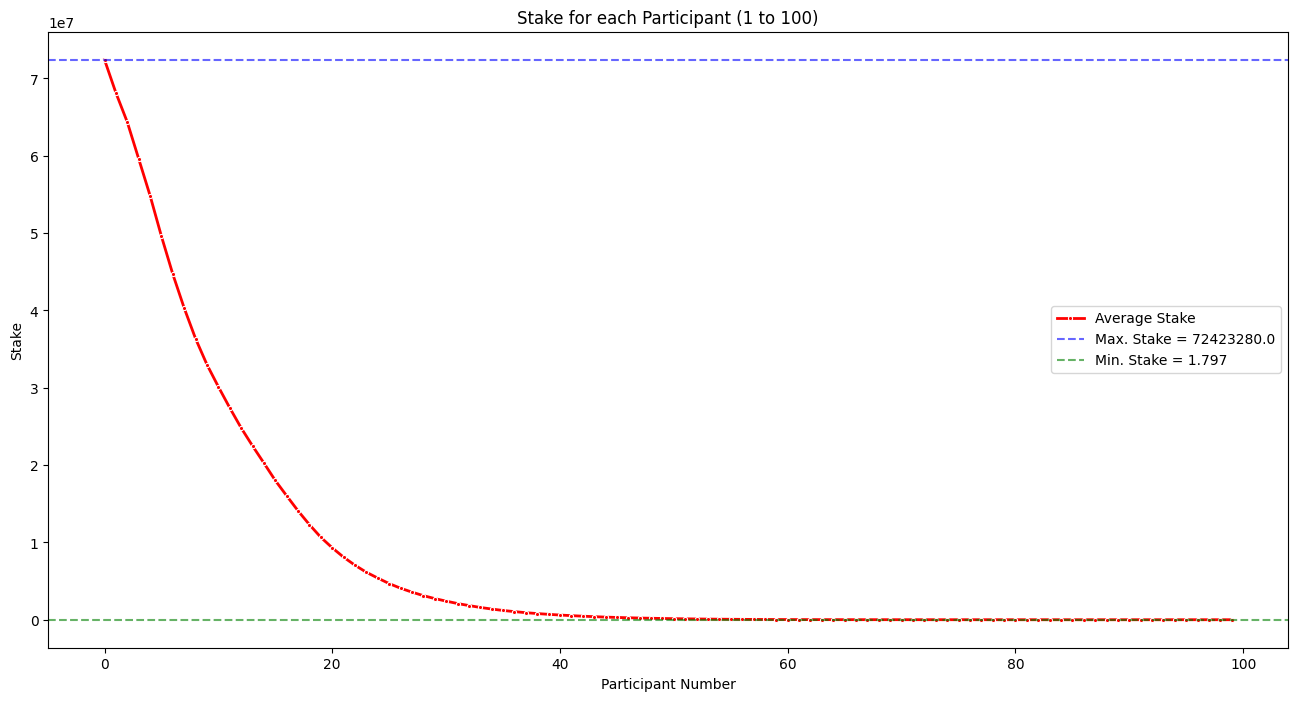

           stake  stake_weight
0   7.242328e+07  9.147360e-02
1   6.814129e+07  8.606527e-02
2   6.435351e+07  8.128115e-02
3   5.961341e+07  7.529420e-02
4   5.485729e+07  6.928703e-02
..           ...           ...
95  1.978800e+01  2.499306e-08
96  1.109200e+01  1.400965e-08
97  6.138000e+00  7.752548e-09
98  3.390000e+00  4.281710e-09
99  1.797000e+00  2.269685e-09

[100 rows x 2 columns]


In [ ]:
# %%

# Let's now sample a group of participants from the population
# and calculate the stake weight for each participant.

group_size = 100

group_stakes = get_stake_distribution(
    population,
    group_size=group_size,
    num_iter=1000,
    plot_it=True,
)
print(group_stakes)

In [ ]:
# %%

print(group_stakes.describe())

              stake  stake_weight
count  1.000000e+02  1.000000e+02
mean   7.917397e+06  1.000000e-02
std    1.663776e+07  2.101418e-02
min    1.797000e+00  2.269685e-09
25%    1.831127e+03  2.312789e-06
50%    1.492149e+05  1.884646e-04
75%    4.851468e+06  6.127605e-03
max    7.242328e+07  9.147360e-02


In [ ]:
# %%

# Let's now assign a committee of the fixed group_size
# based on the stake weight of each

results = assign_commitee_plus(
    group_stakes,
    committee_size=group_size,
    num_iter=1000,
)

In [ ]:
# %%

# Let's now create a plots of committee assignments where we vary
# the group size over {100, 200, 300, 400, 500} and see how the
# committee selection and seat count changes.

# Initialize Parameters:
# comm_sizes = [100]  # vary over committee size, k
# group_sizes = [100]  # vary over group size, n
comm_sizes = [100, 200, 300, 400, 500]  # vary over committee size, k
group_sizes = [100, 200, 300, 400, 500]  # vary over group size, n
num_iter = 1000  # Number of iterations for Monte Carlo simulation

# Note that the number of iterations here can be interpreted as the number
# of selection rounds for the committee, which we call an epoch.
# If we have a new epoch per day, then 1000 iterations is about 3 years.


Committee Size = 100
Group Size = 100


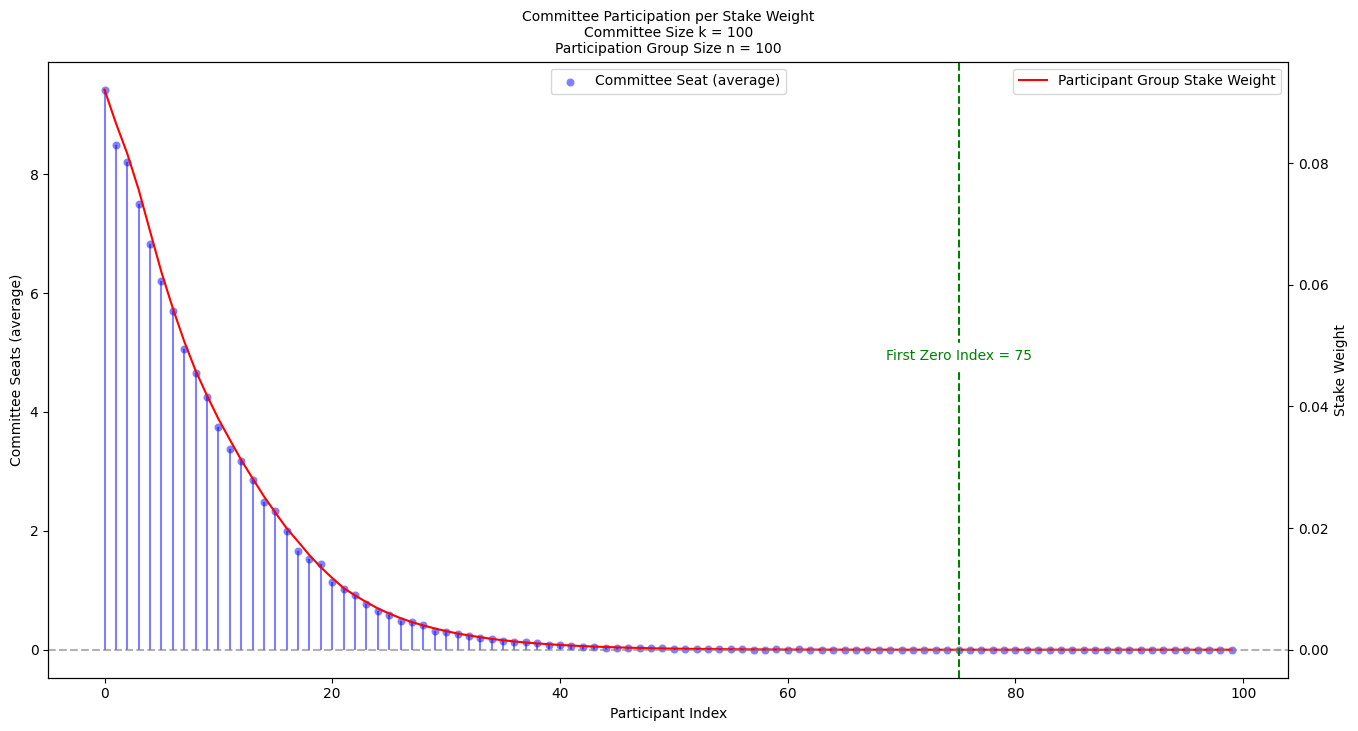

Group Size = 200


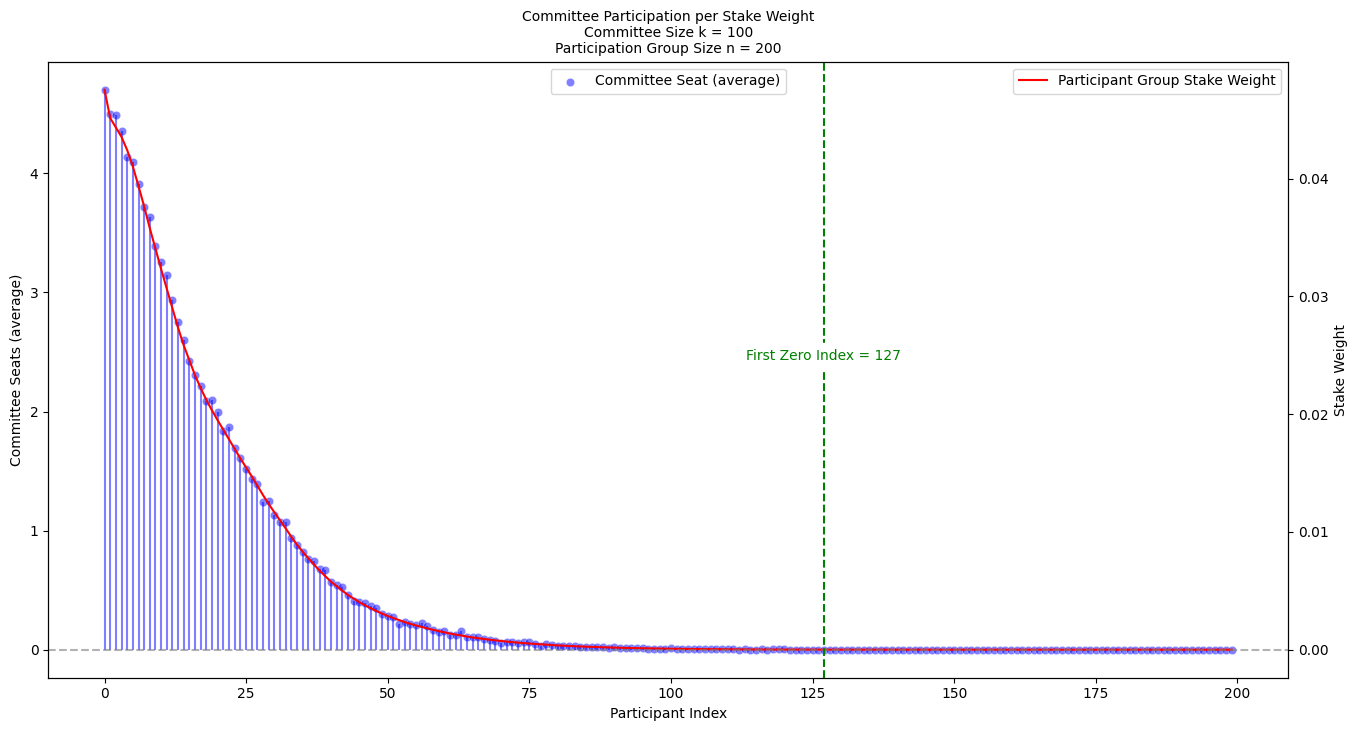

Group Size = 300


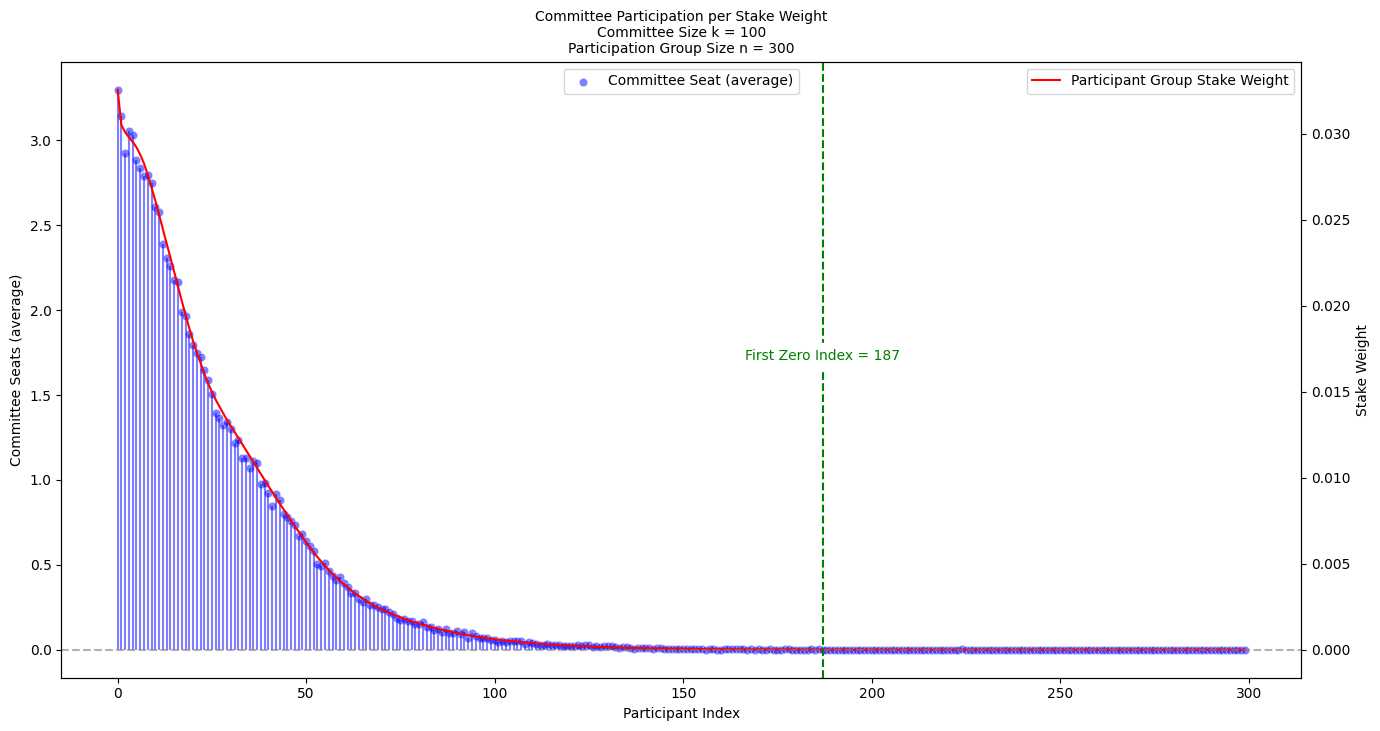

Group Size = 400


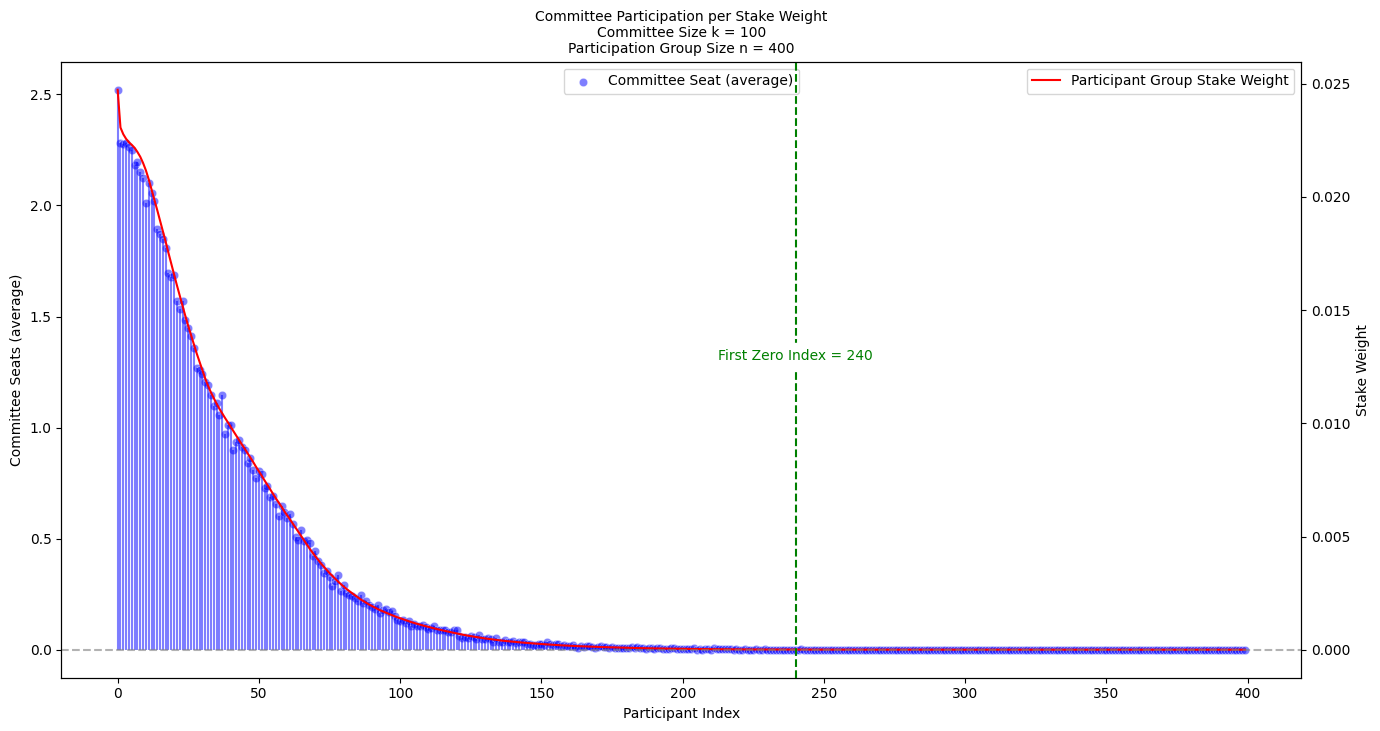

Group Size = 500


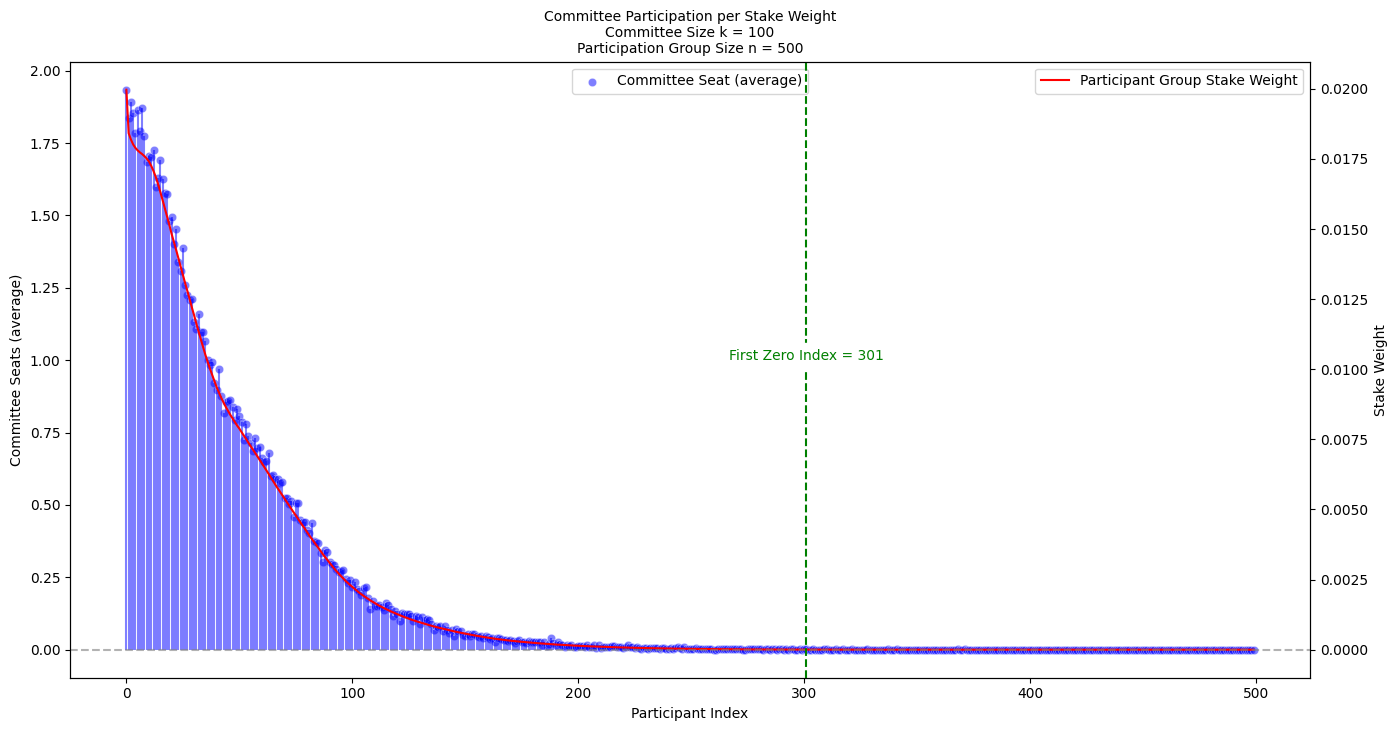


Committee Size = 200
Group Size = 100


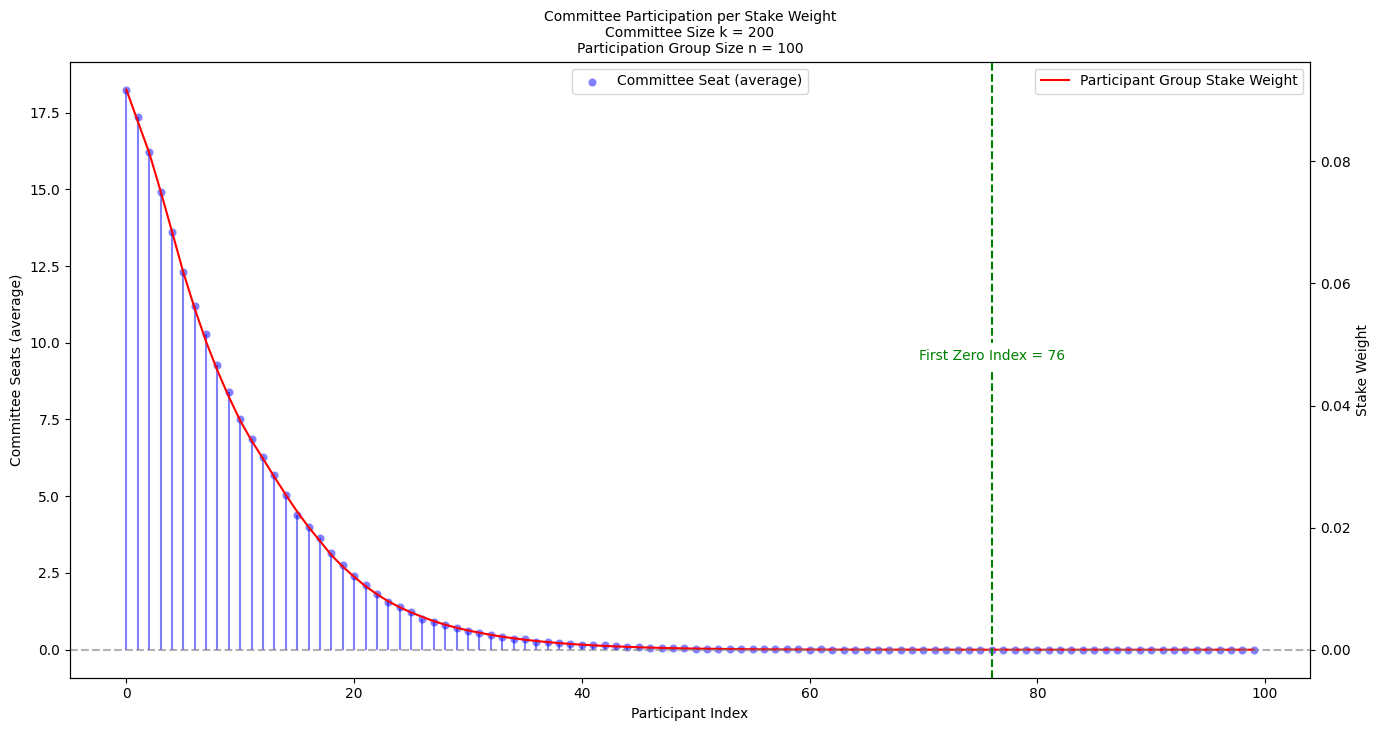

Group Size = 200


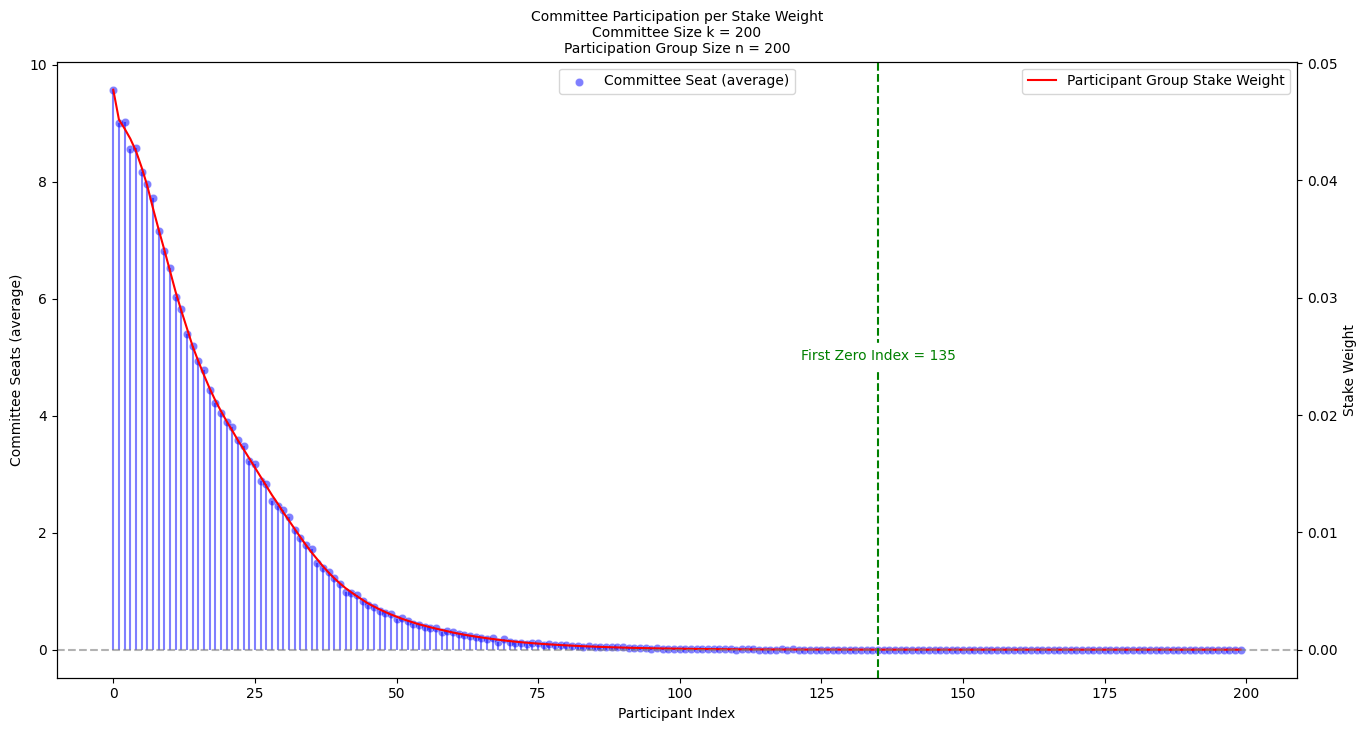

Group Size = 300


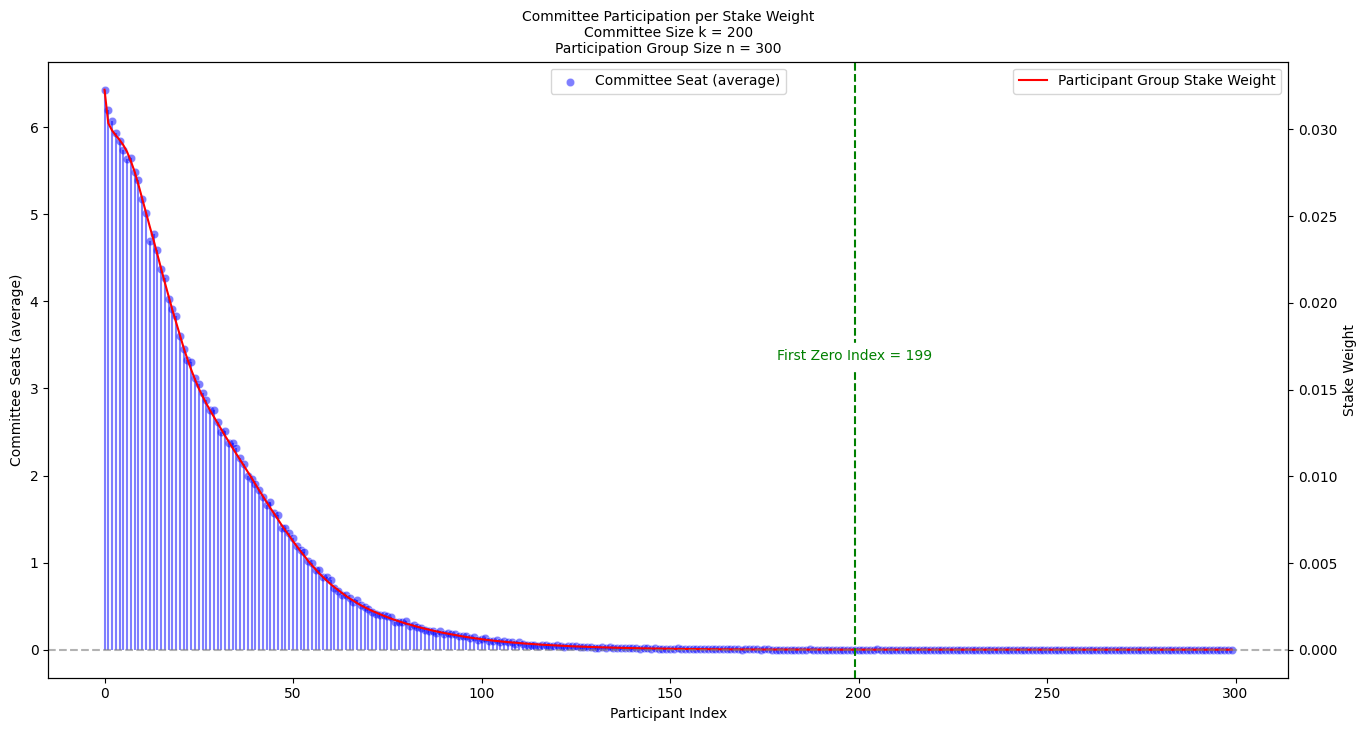

Group Size = 400


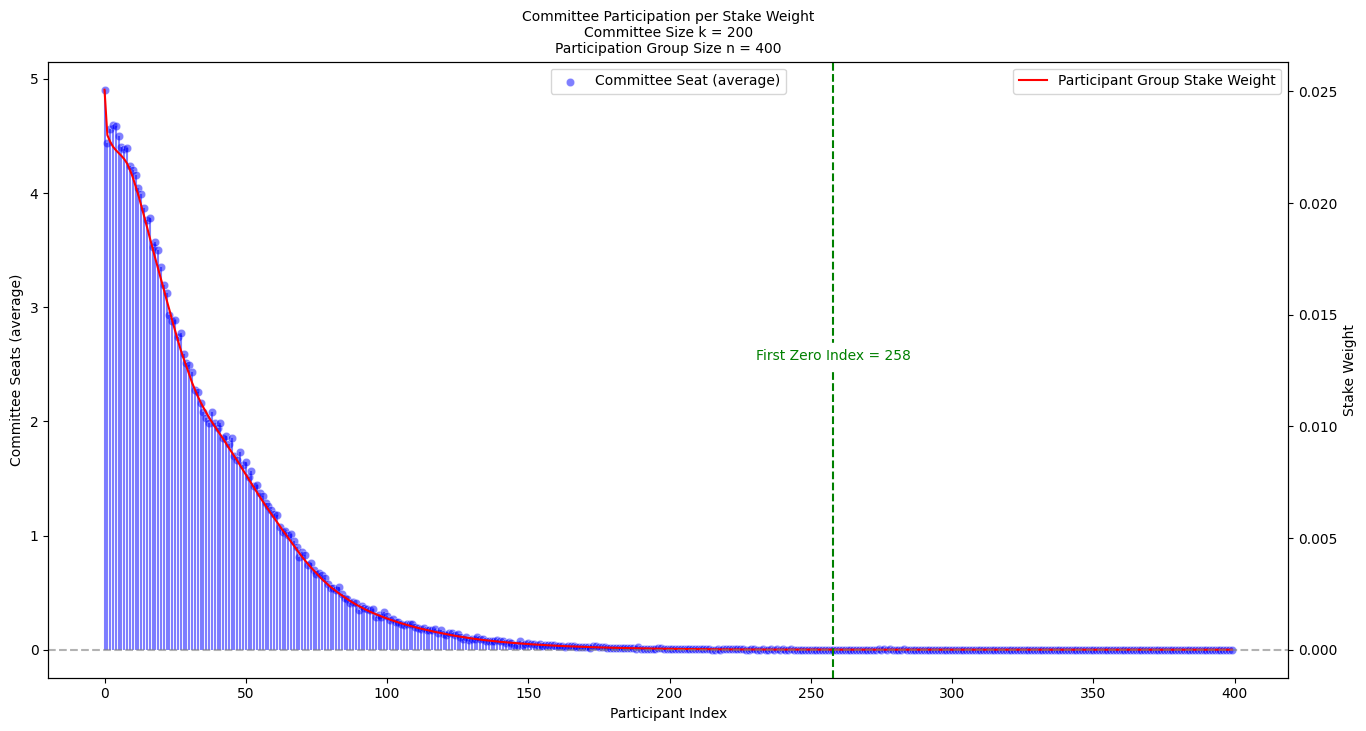

Group Size = 500


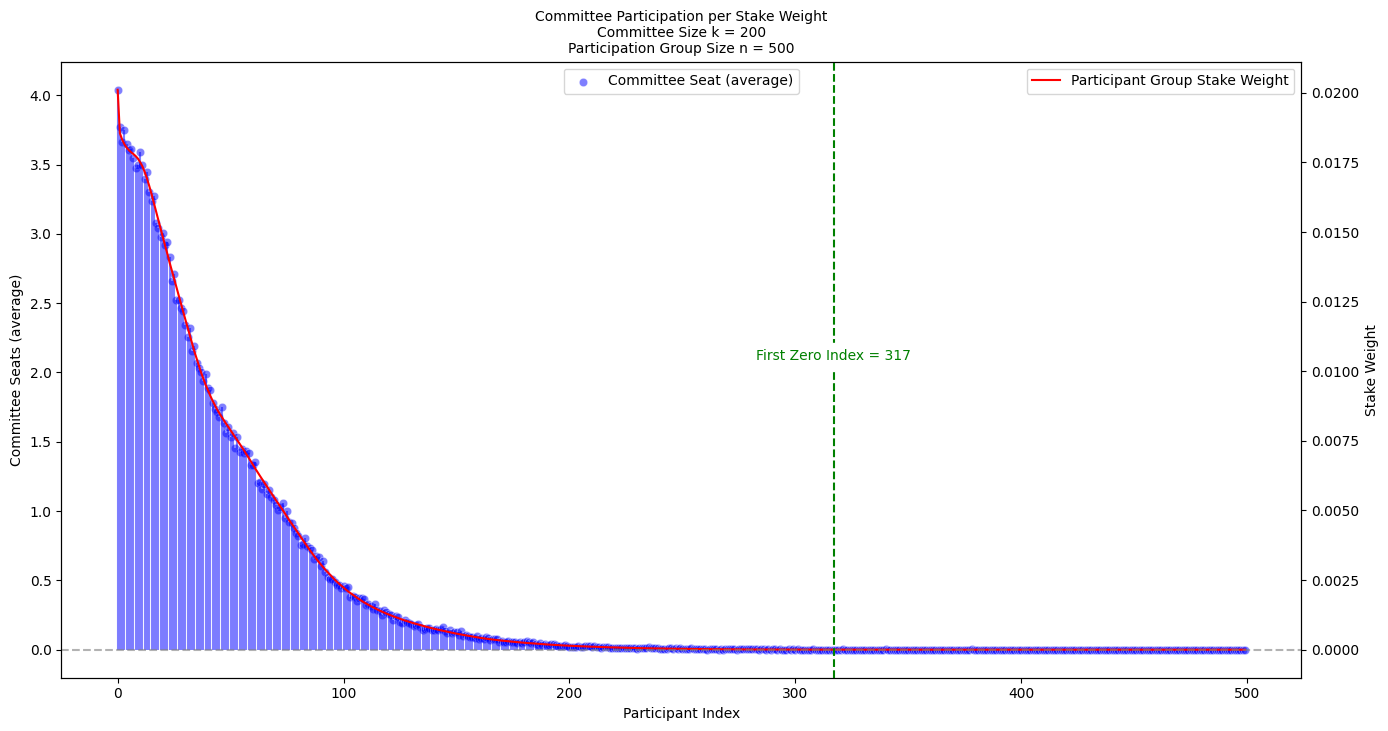


Committee Size = 300
Group Size = 100


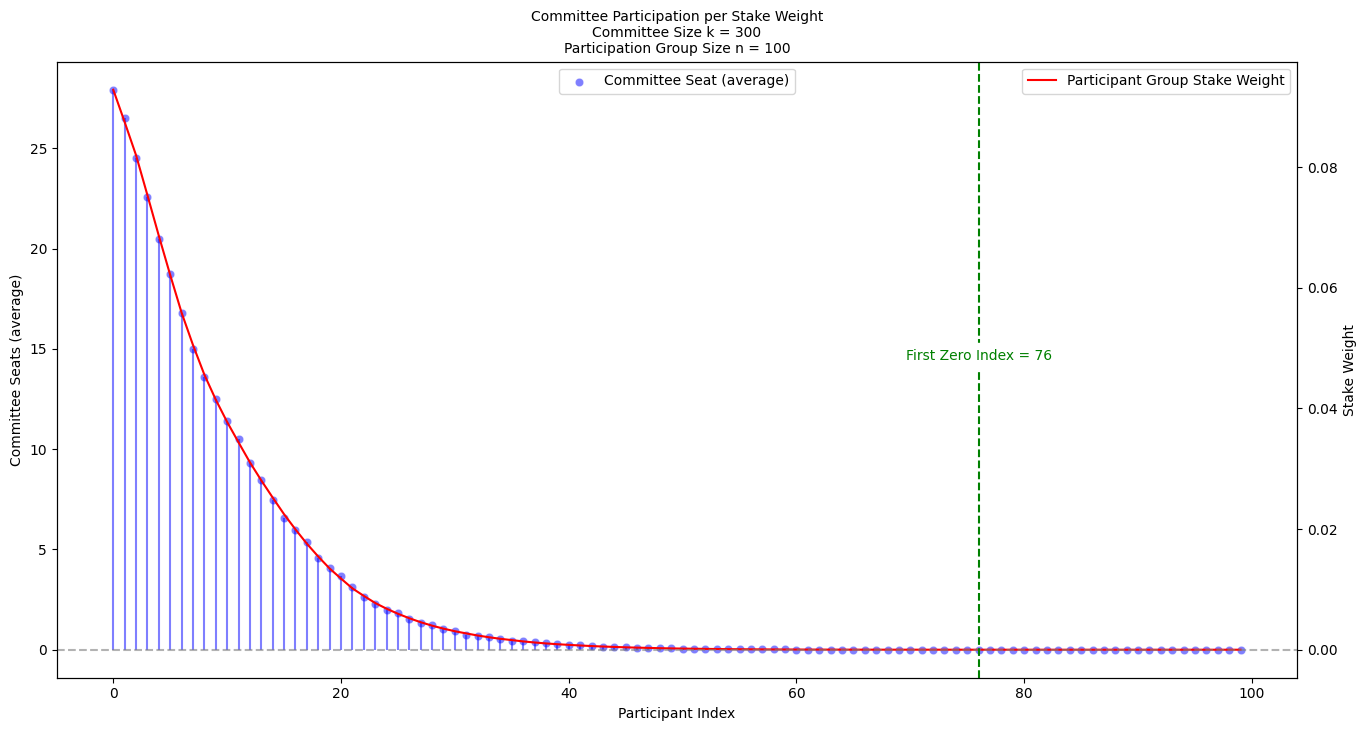

Group Size = 200


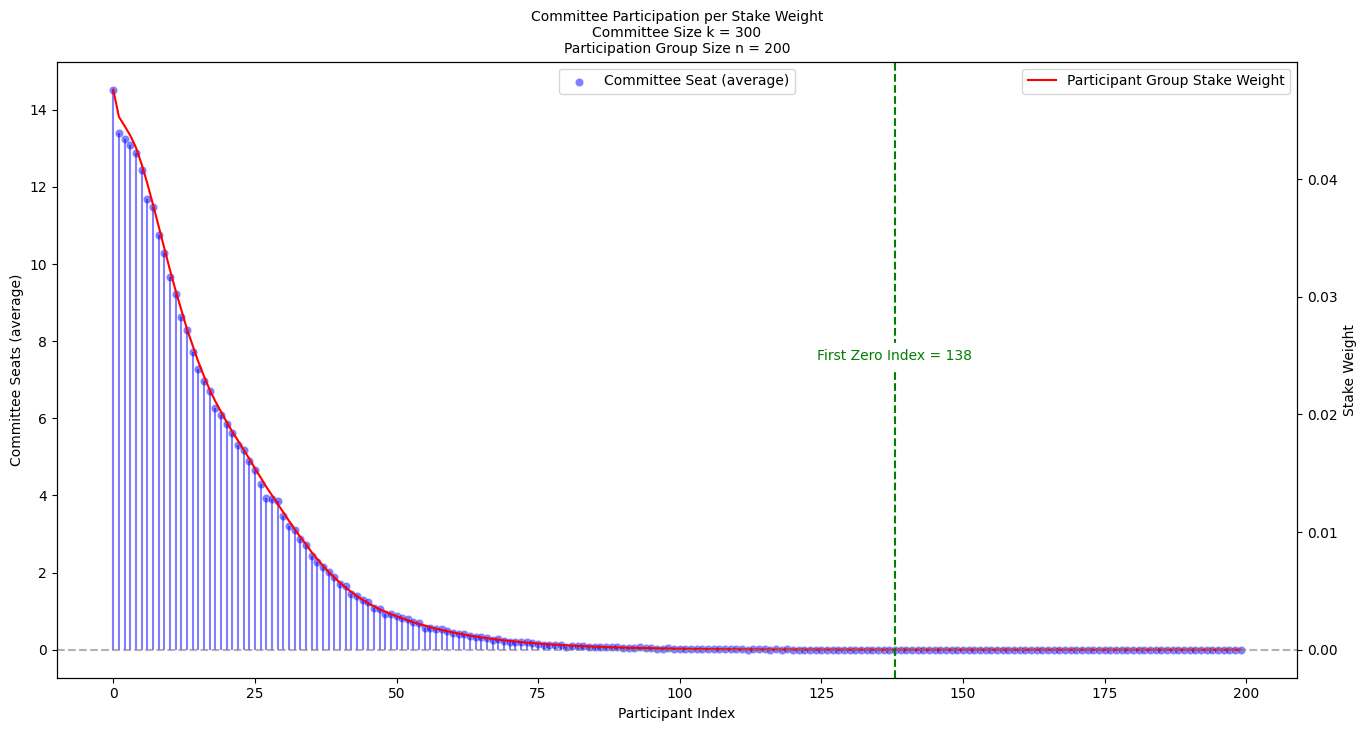

Group Size = 300


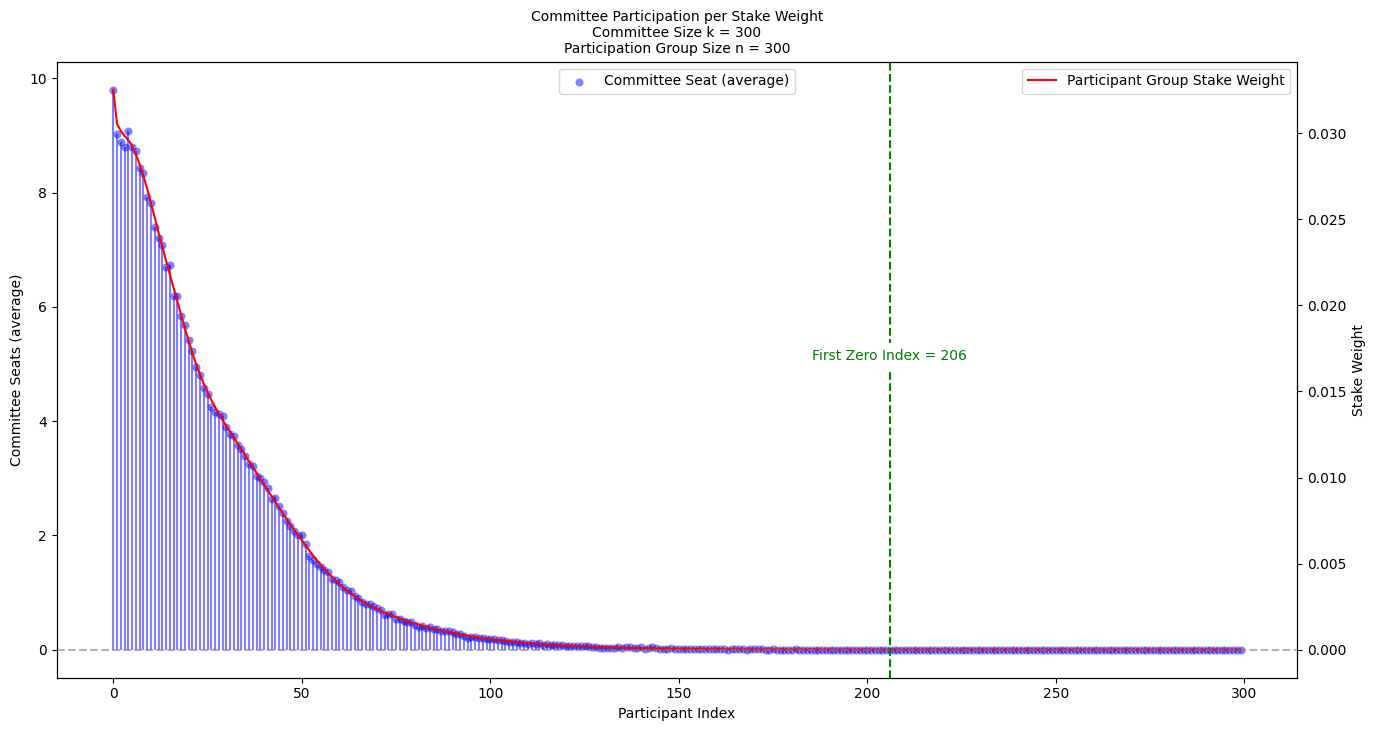

Group Size = 400


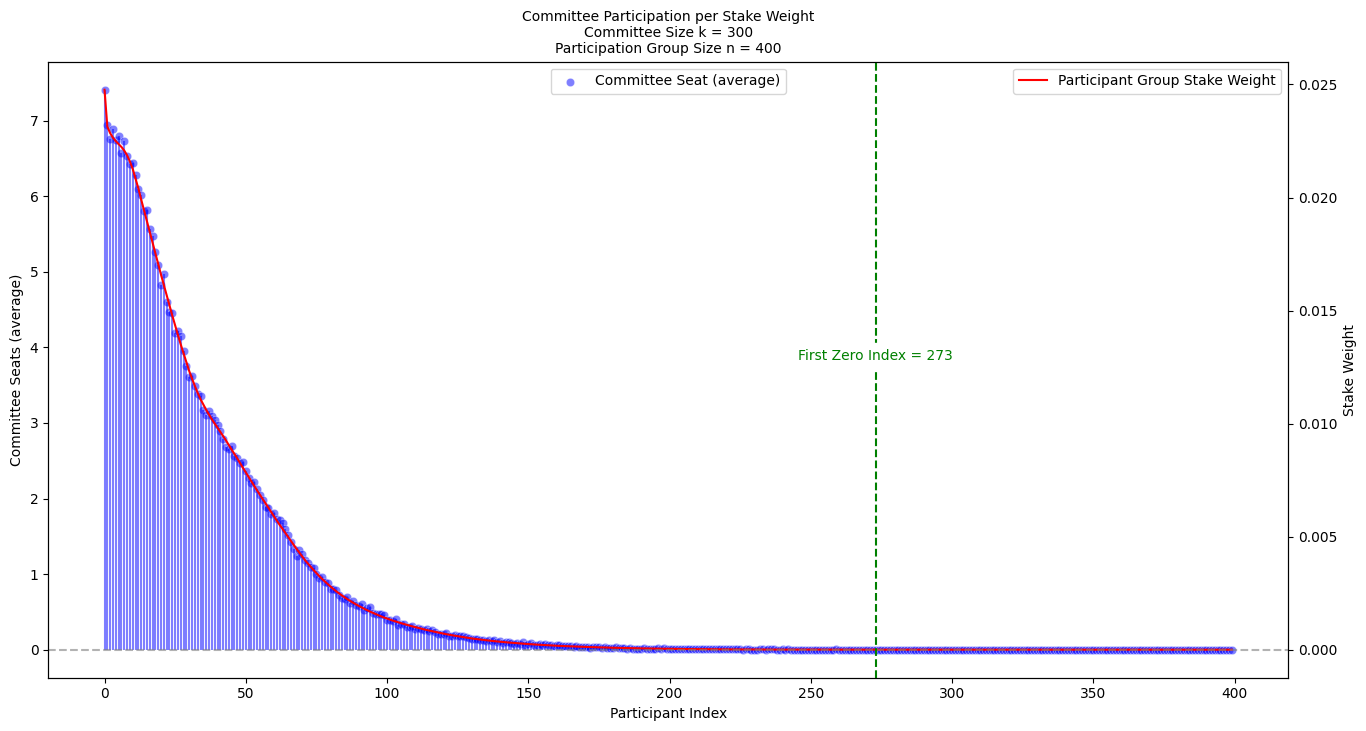

Group Size = 500


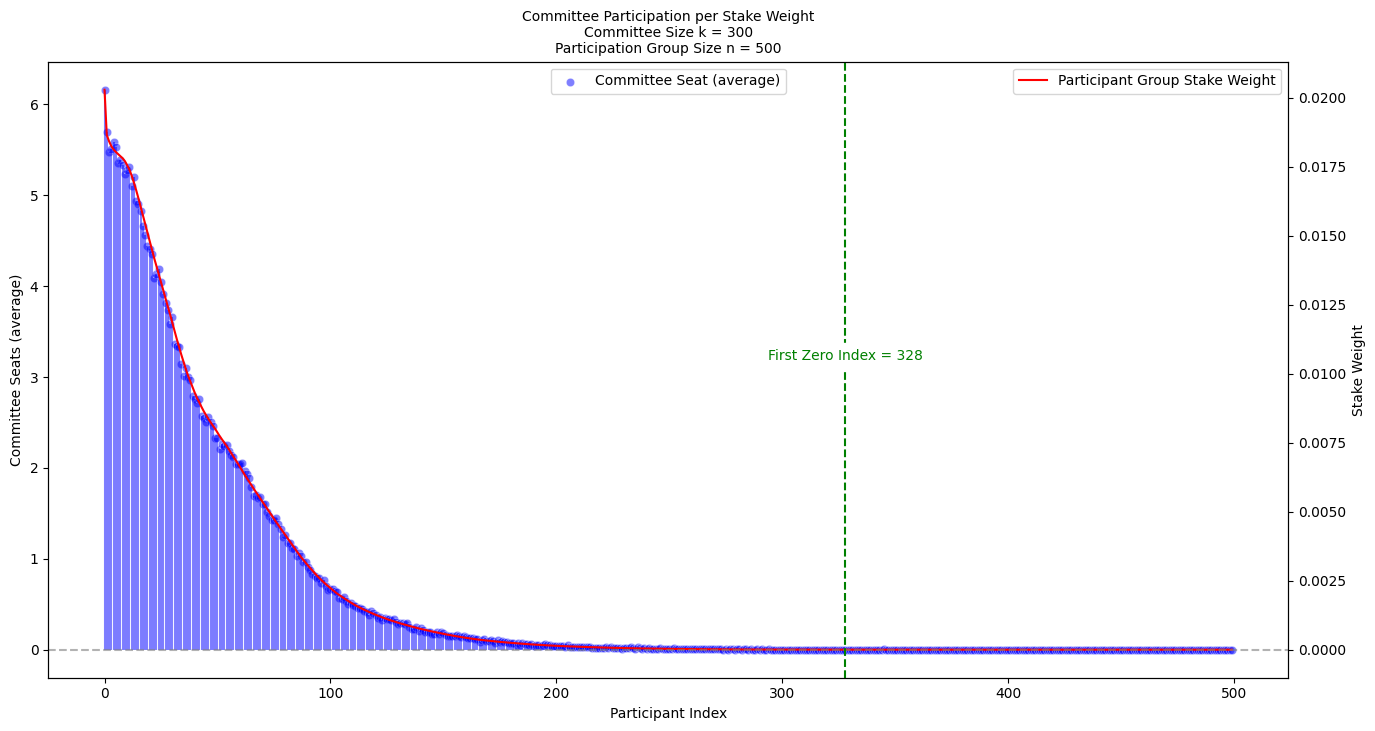


Committee Size = 400
Group Size = 100


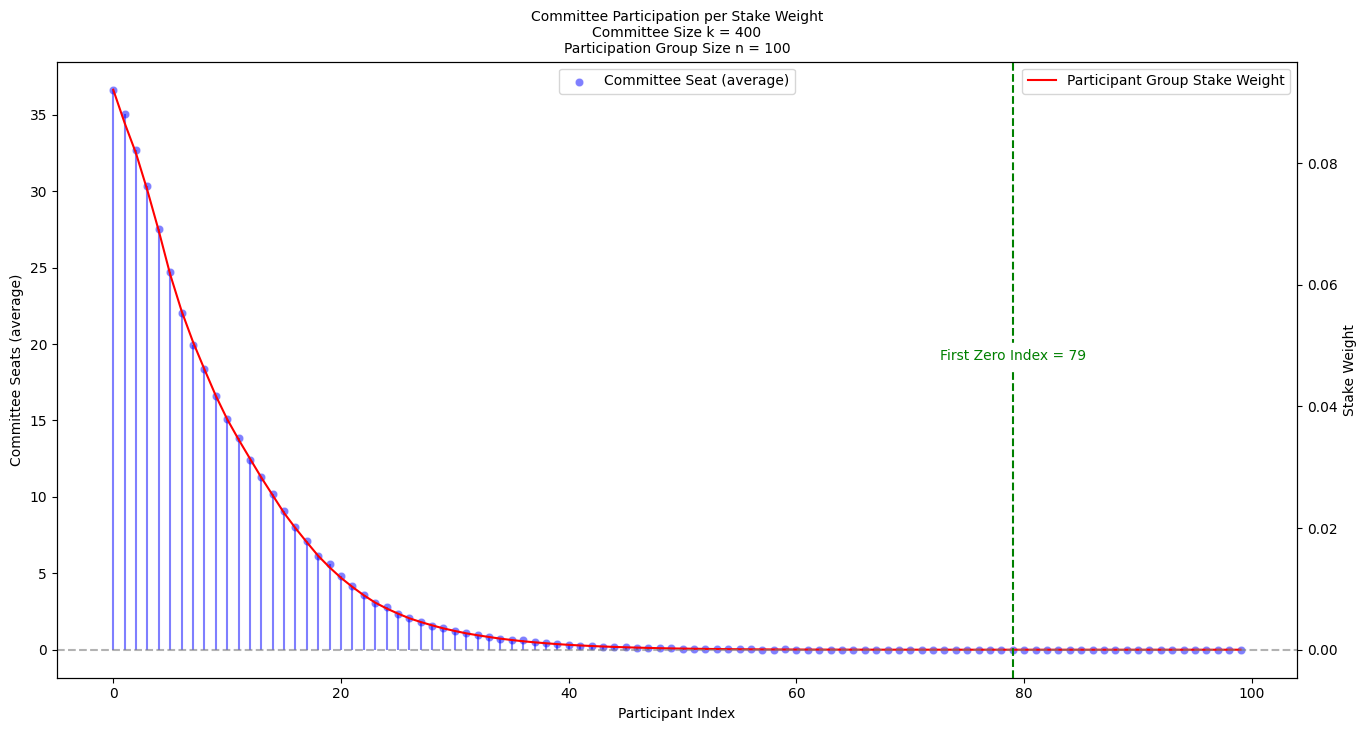

Group Size = 200


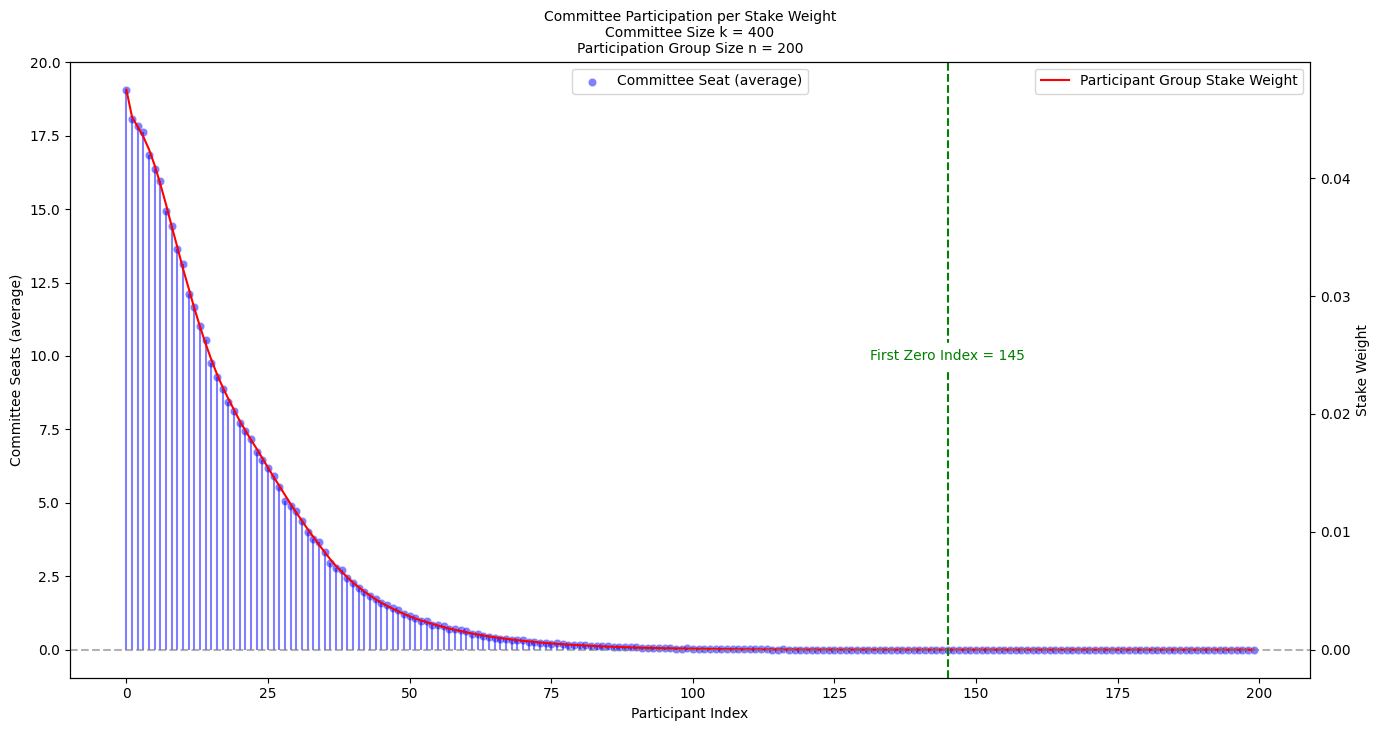

Group Size = 300


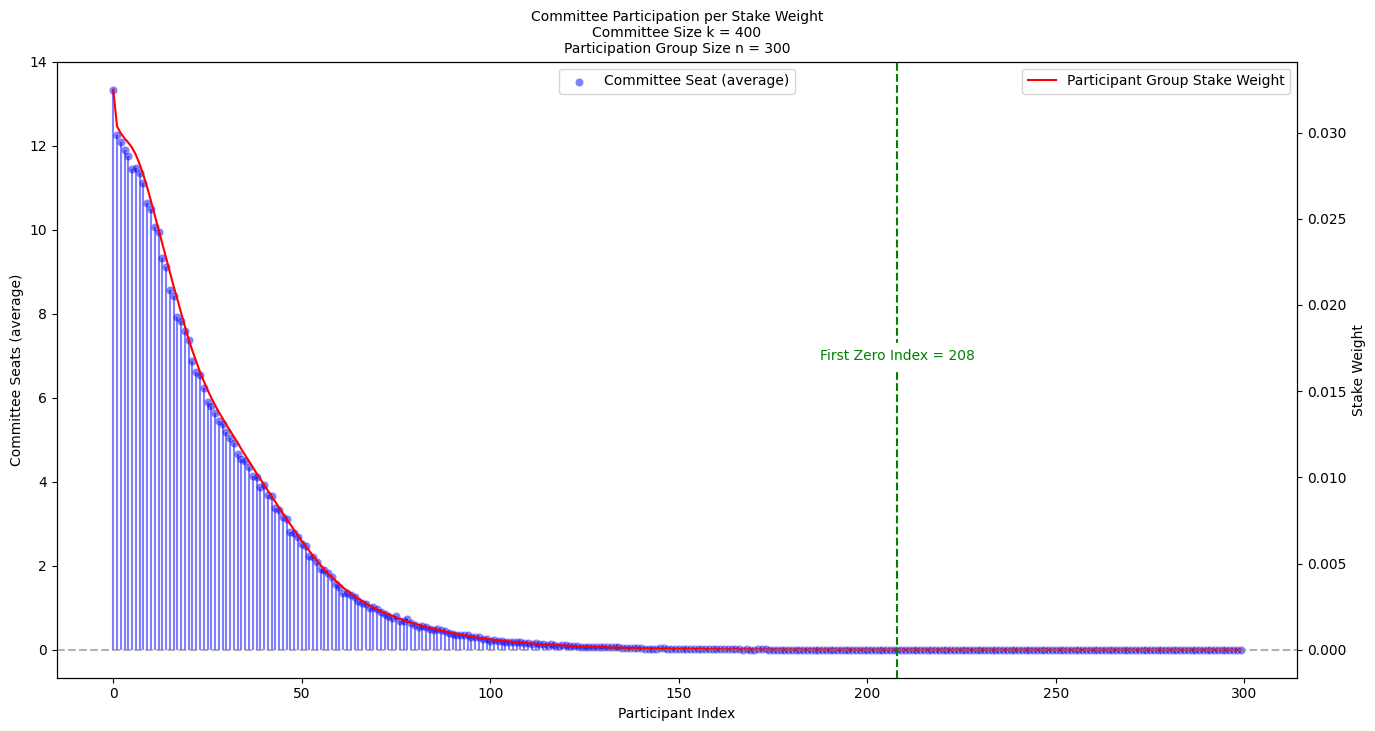

Group Size = 400


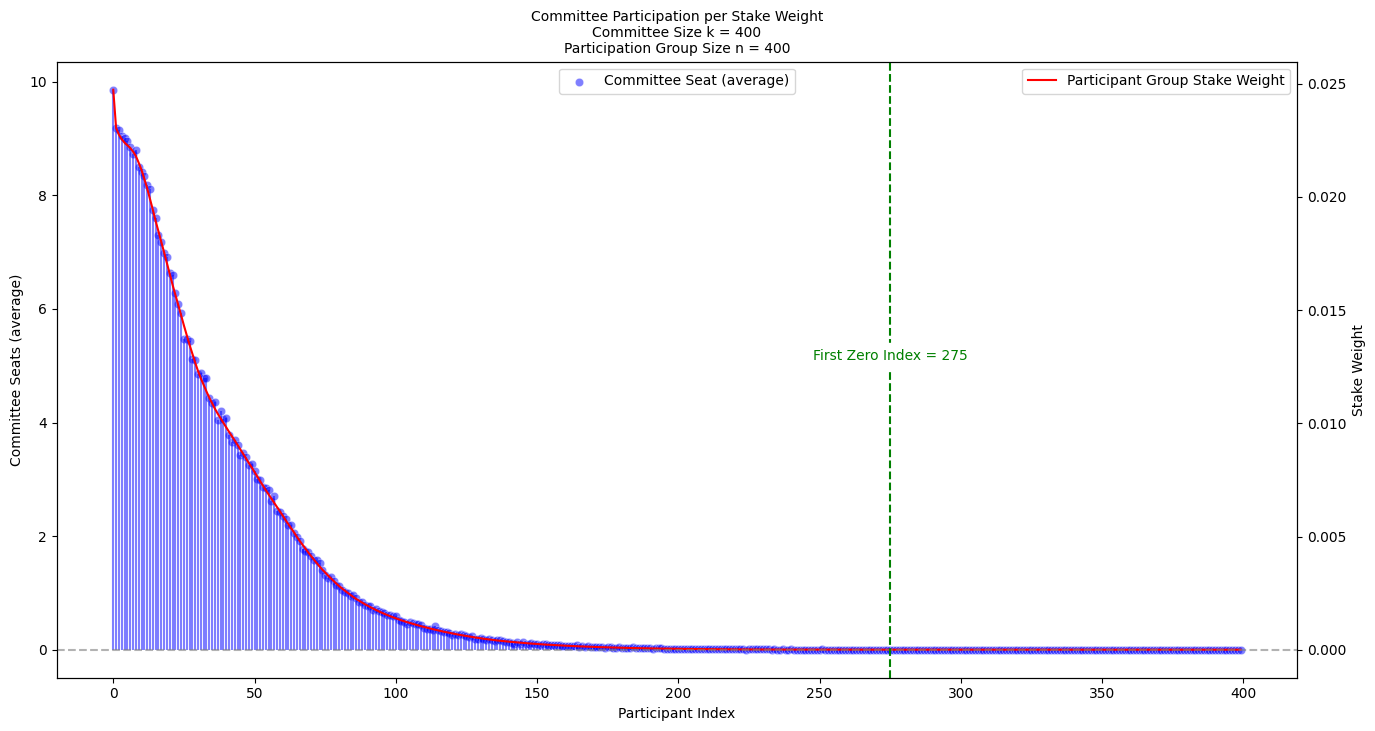

Group Size = 500


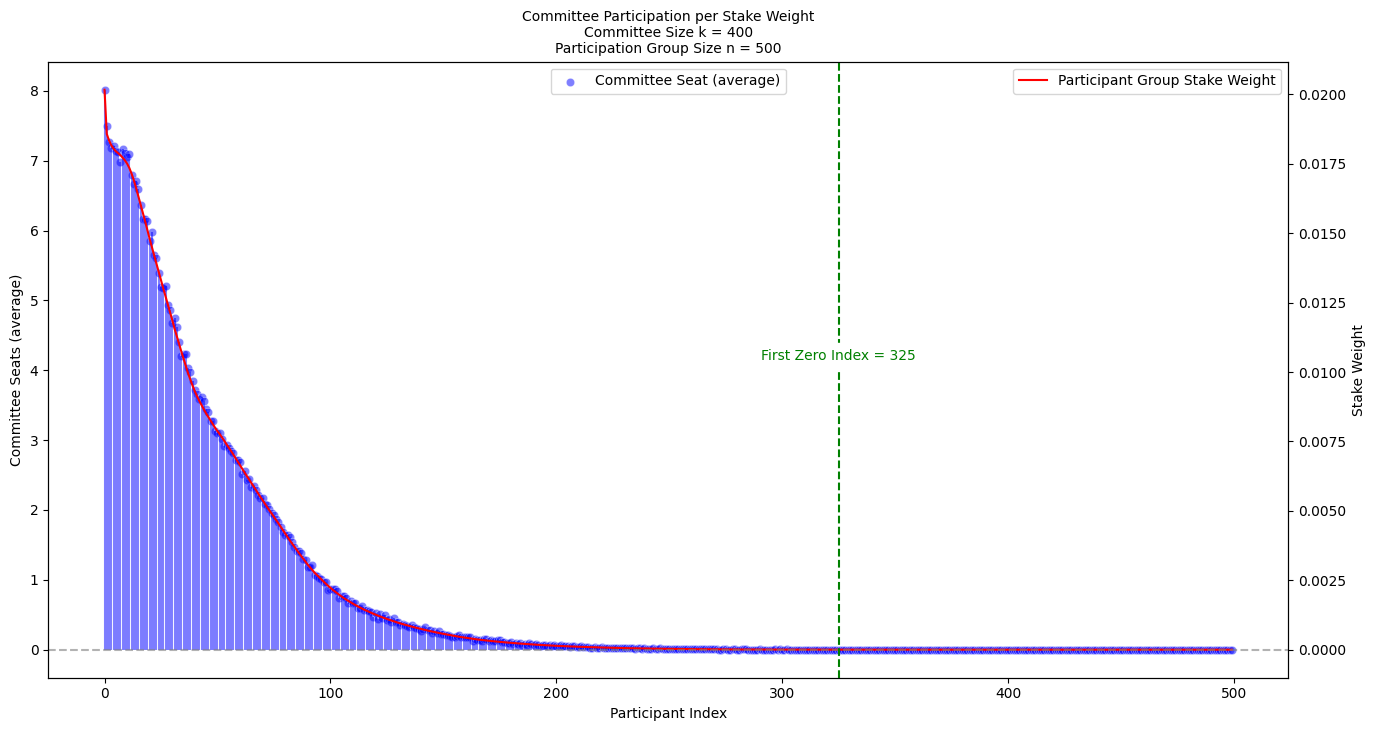


Committee Size = 500
Group Size = 100


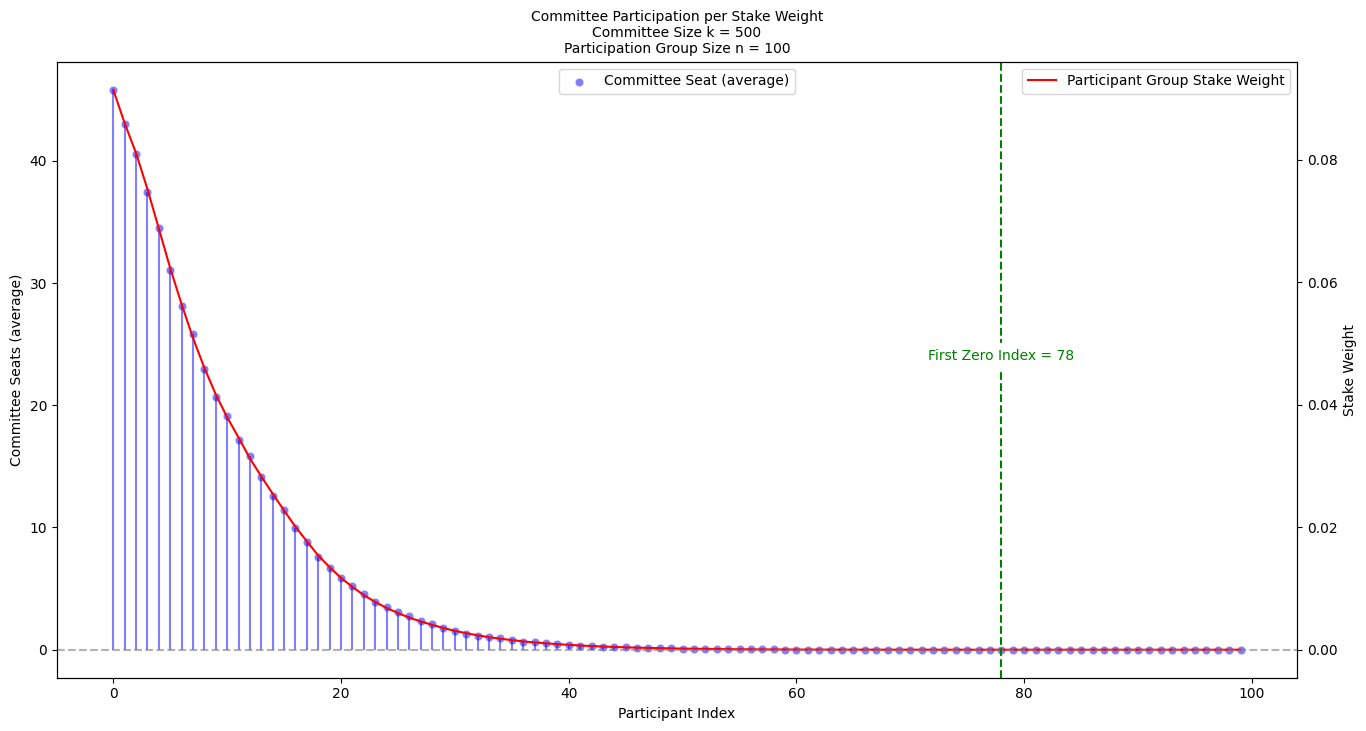

Group Size = 200


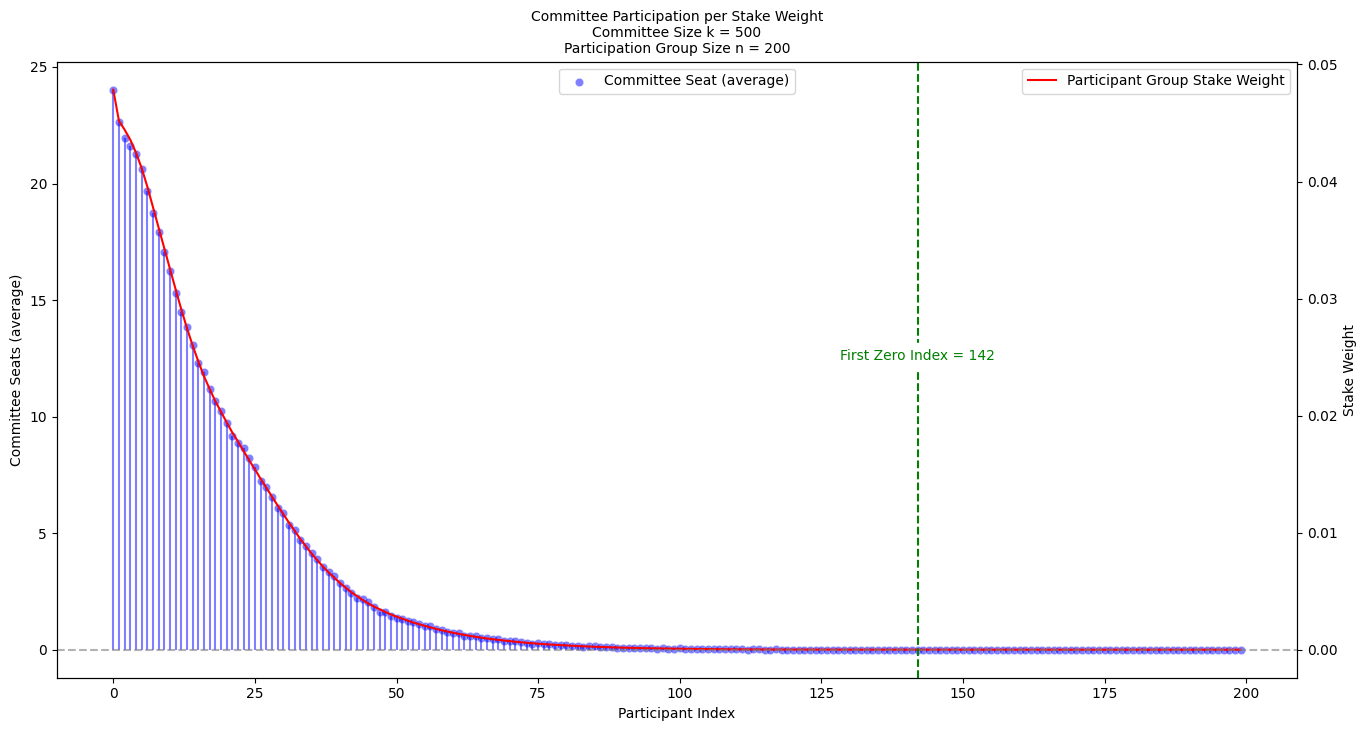

Group Size = 300


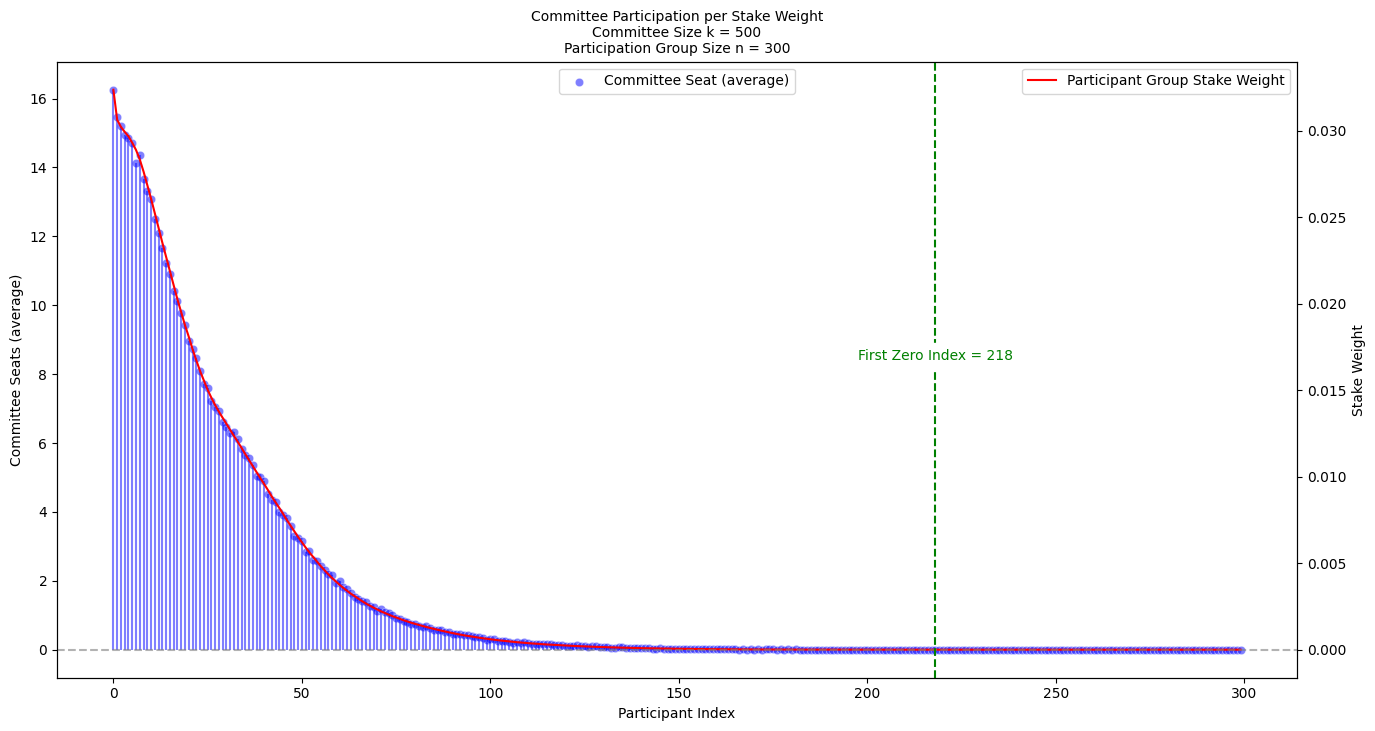

Group Size = 400


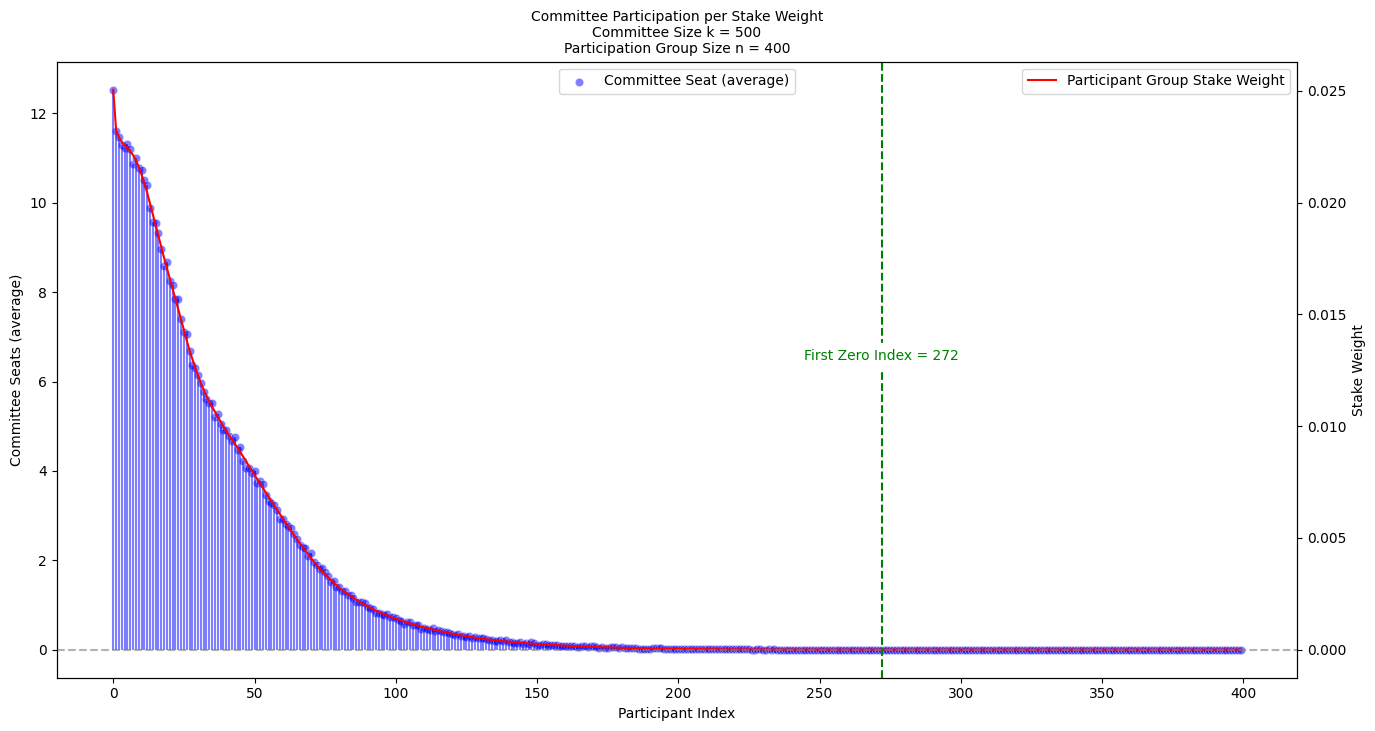

Group Size = 500


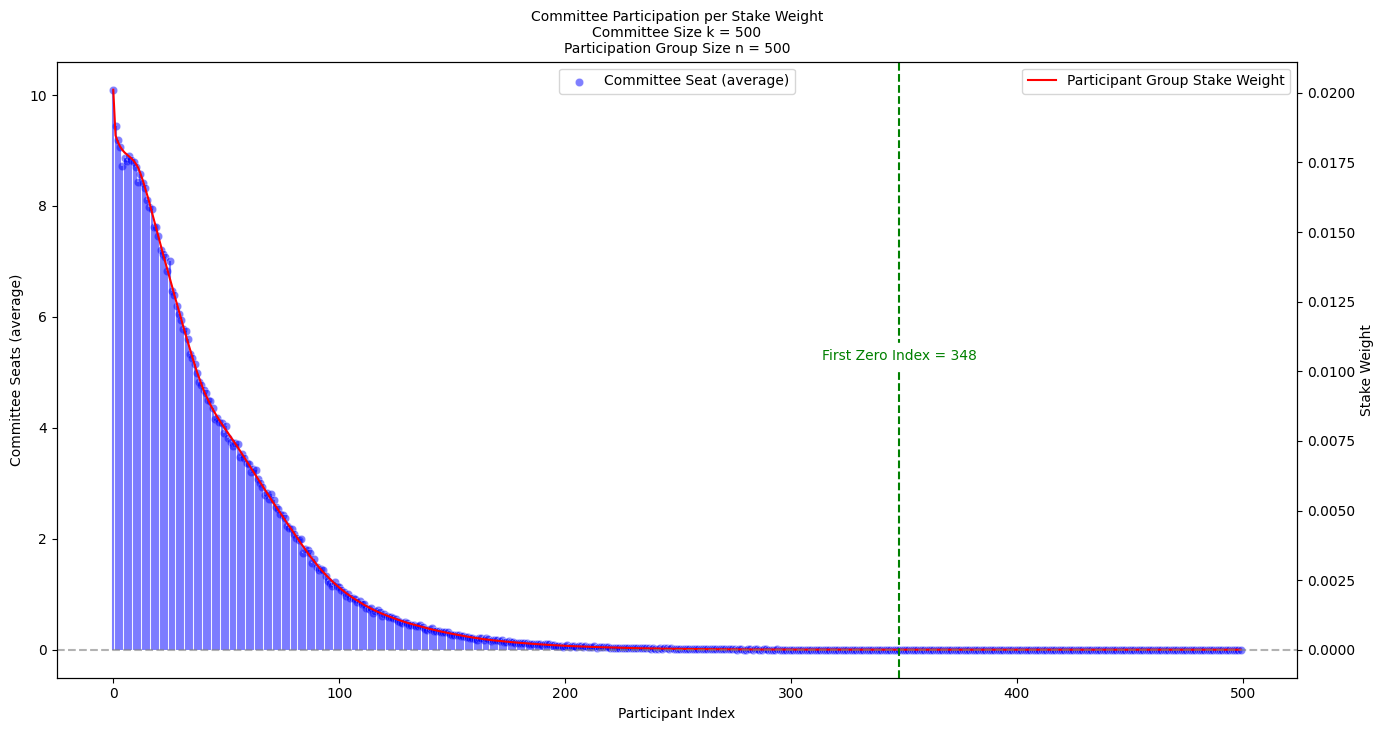

In [ ]:
# %%

# Call the function
sim_results_df = simulate(
    population,
    comm_sizes,
    group_sizes,
    num_iter,
    plot_it=True,
)

In [ ]:
# %%

# committee_seats_df = committee_seats_df.swaplevel(axis=1).sort_index(axis=1)

In [ ]:
# %%

# Extract the data for plotting

col_index = sim_results_df.columns
commitee_sizes = [
    int(col.split("=")[1].strip()) for col in col_index.get_level_values(0).unique()
]
group_sizes = [
    int(col.split("=")[1].strip()) for col in col_index.get_level_values(1).unique()
]

# Examine the data for committee size = 100
committee_size = 100

committee_label = f"Committee Size = {committee_size}"
committee_voters = sim_results_df.loc["Distinct Voters", committee_label]
committee_seats = sim_results_df.loc["Committee Seats", committee_label]

In [ ]:
# %%

# Distinct Voters
print(f"Number of distinct voters for {committee_label}:")
mean_values = committee_voters.loc["mean"]
std_dev_values = committee_voters.loc["sd"]

# Calculate the percentage of participants not selected for committee seats
not_selected_percentages = (1.0 - mean_values / group_sizes) * 100
not_selected_percentages.name = "Excluded (%)"

print(
    pd.concat(
        [mean_values, std_dev_values, not_selected_percentages],
        axis=1,
    )
)

Number of distinct voters for Committee Size = 100:
                    mean        sd Excluded (%)
Group Size                                     
Group Size = 100  25.827  2.092623       74.173
Group Size = 200  40.283  2.777213      79.8585
Group Size = 300  50.234  3.365003    83.255333
Group Size = 400  57.559   3.56041     85.61025
Group Size = 500  63.074  3.493784      87.3852


In [ ]:
# %%

# Create a DataFrame for easier plotting with seaborn
plot_data = pd.DataFrame(
    {
        "Group Size": group_sizes,
        "Percentage Excluded": not_selected_percentages,
        "Std Dev": std_dev_values,
    }
)
print(
    "Percentage of Group Participants Not Selected"
    f" for Committee Seats, k = {committee_size}:"
)

print(plot_data)

Percentage of Group Participants Not Selected for Committee Seats, k = 100:
                  Group Size Percentage Excluded   Std Dev
Group Size                                                
Group Size = 100         100              74.173  2.092623
Group Size = 200         200             79.8585  2.777213
Group Size = 300         300           83.255333  3.365003
Group Size = 400         400            85.61025   3.56041
Group Size = 500         500             87.3852  3.493784


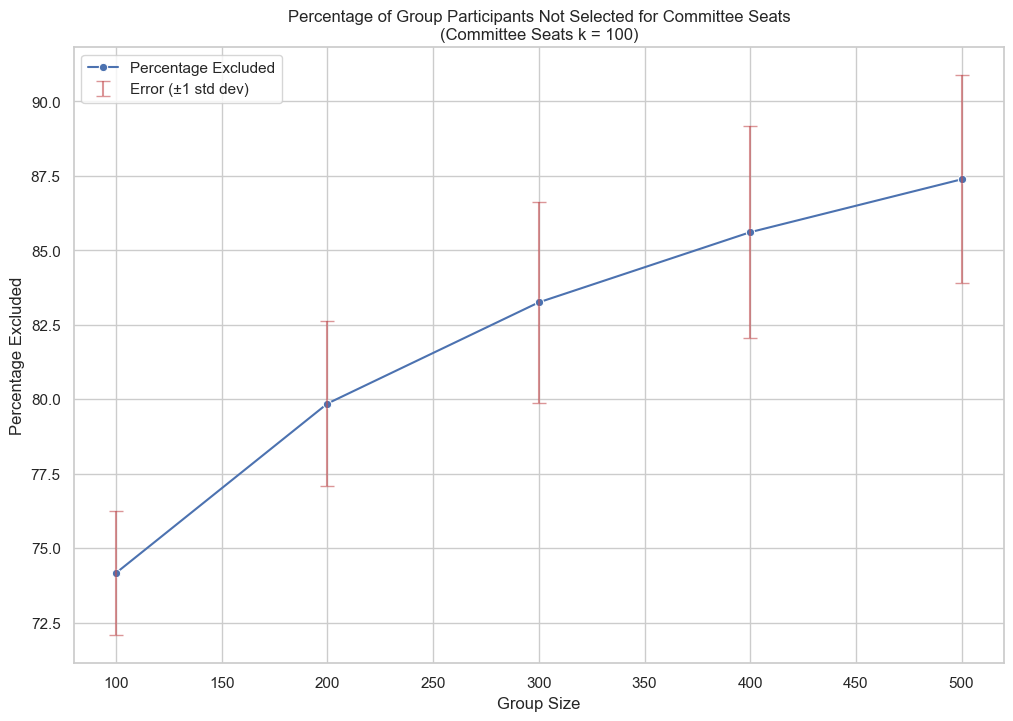

In [ ]:
# %%

# Plot the data with seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot the main line without error bars
sns.lineplot(
    x="Group Size",
    y="Percentage Excluded",
    data=plot_data,
    errorbar=std_error,
    err_style="band",
    marker="o",
    color="b",
    label="Percentage Excluded",
)
# Add error bands using plt.errorbar
plt.errorbar(
    plot_data["Group Size"],
    plot_data["Percentage Excluded"],
    yerr=plot_data["Std Dev"],
    fmt="none",  # No connecting line
    ecolor="r",
    capsize=5,
    alpha=0.6,
    label="Error (±1 std dev)"
)
plt.xlabel("Group Size")
plt.ylabel("Percentage Excluded")
plt.title("Percentage of Group Participants Not Selected for Committee Seats"
          f"\n(Committee Seats k = {committee_size})")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# %%

sim_results_df.loc["Distinct Voters", :]

Committee Size Committee Size = 100                                    \
Group Size         Group Size = 100 Group Size = 200 Group Size = 300   
mean                         25.827           40.283           50.234   
sd                         2.092623         2.777213         3.365003   

Committee Size                                   Committee Size = 200  \
Group Size     Group Size = 400 Group Size = 500     Group Size = 100   
mean                     57.559           63.074               31.186   
sd                      3.56041         3.493784             2.249312   

Committee Size                                                     \
Group Size     Group Size = 200 Group Size = 300 Group Size = 400   
mean                     50.443           66.605           79.679   
sd                     2.904953         3.441943         4.076022   

Committee Size                   ... Committee Size = 400                   \
Group Size     Group Size = 500  ...     Group Size = 100 Group Size = 200   
mean                     90.576  ...                36.16           61.054   
sd                     4.447721  ...             2.252643         3.018126   

Committee Size                                                     \
Group Size     Group Size = 300 Group Size = 400 Group Size = 500   
mean                     82.071          100.477          117.062   
sd                     3.594713         4.350571         4.736049   

Committee Size Committee Size = 500                                    \
Group Size         Group Size = 100 Group Size = 200 Group Size = 300   
mean                         37.674           63.951           86.967   
sd                         2.077913         3.105575         3.688619   

Committee Size                                    
Group Size     Group Size = 400 Group Size = 500  
mean                    106.835          125.159  
sd                     4.323861         4.893028  

[2 rows x 25 columns]

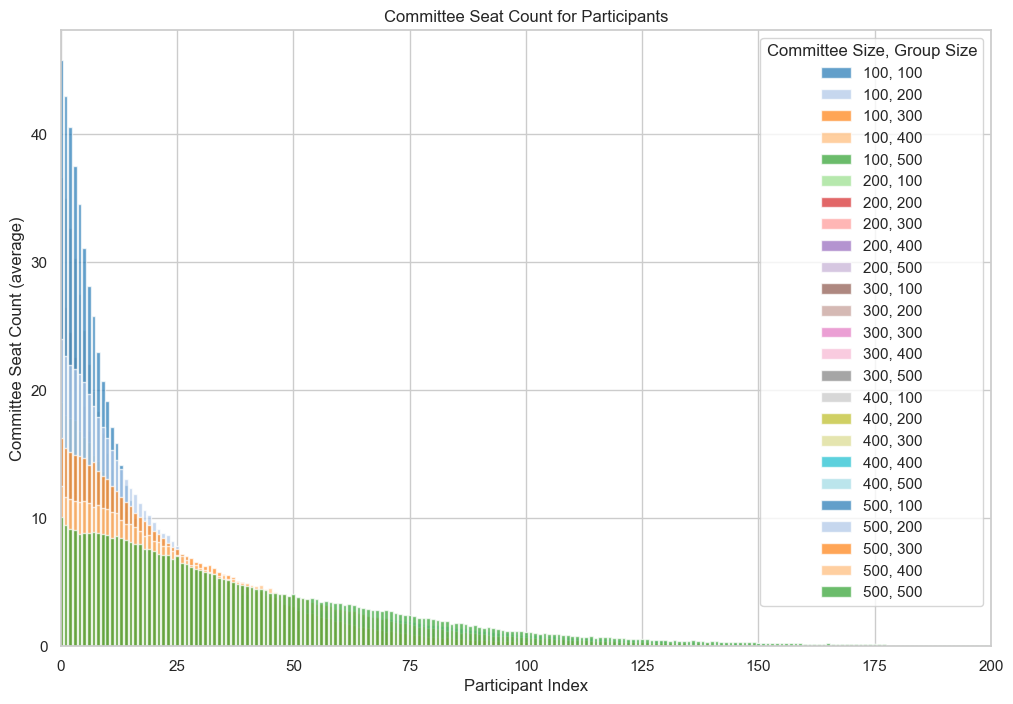

In [ ]:
# %%

# Plot the committee selection counts distribution
fig = plt.figure(figsize=(12, 8))

plot_data = sim_results_df.loc["Committee Seats"].loc["mean"]

for c, g in plot_data.index:

    y = plot_data.loc[(c, g)]
    x = y.index

    n_c = int(c.split("=")[1].strip())
    n_g = int(g.split("=")[1].strip())

    colors = sns.color_palette("tab20", len(plot_data.index))
    color_idx = list(plot_data.index).index((c, g))
    # plt.bar(x, y, alpha=0.7, color=colors[color_idx], label=f"{n_c}, {n_g}")
    plt.bar(x, y, alpha=0.7, color=colors[color_idx], label=f"{n_c}, {n_g}")

plt.xlabel("Participant Index")
plt.ylabel("Committee Seat Count (average)")
plt.title("Committee Seat Count for Participants")
plt.legend(title="Committee Size, Group Size")
plt.xlim(0, 200)
plt.show()